# Median Oxygen Map for Each Year

In [336]:
# import all modules we may need
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import cartopy.crs as ccrs       # ccrs contains information about projections
import cartopy                   # contains all other cartopy functions/classes/methods
import cmocean
from All_functions import preprocess_df_stored
from All_functions.preprocess_df_stored import * 
import pandas as pd

### Going to use all WOD Data

In [337]:
url_root = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/wod/'
year = 2018
file_name = '/wod_ctd_2018.nc'
ds2 = xr.open_dataset(url_root + str(year) + file_name, 
    decode_times=False)

In [338]:
ds2

<xarray.Dataset>
Dimensions:                         (casts: 22618, z_obs: 4129661, Temperature_obs: 4129636, Salinity_obs: 4089958, Oxygen_obs: 2566627, Chlorophyll_obs: 1604001, Pressure_obs: 3514144, Nitrate_obs: 17953, numberofpis: 140)
Coordinates:
    lat                             (casts) float32 ...
    lon                             (casts) float32 ...
    time                            (casts) float64 ...
    z                               (z_obs) float32 ...
Dimensions without coordinates: casts, z_obs, Temperature_obs, Salinity_obs, Oxygen_obs, Chlorophyll_obs, Pressure_obs, Nitrate_obs, numberofpis
Data variables: (12/75)
    country                         (casts) |S64 ...
    WOD_cruise_identifier           (casts) |S64 ...
    originators_cruise_identifier   (casts) |S64 ...
    wod_unique_cast                 (casts) int32 ...
    originators_station_identifier  (casts) |S64 ...
    date                            (casts) int32 ...
    ...                              ...
    Nitrate_WODprofileflag          (casts) int8 ...
    Nitrate_contains_nitrite        (casts) |S64 ...
    Primary_Investigator            (numberofpis) |S64 ...
    Primary_Investigator_VAR        (numberofpis) |S64 ...
    Primary_Investigator_row_size   (casts) float64 ...
    crs                             int32 ...
Attributes: (12/40)
    institution:                   National Centers for Environmental Informa...
    source:                        World Ocean Database
    references:                    World Ocean Database 2018. URL:http://data...
    title:                         World Ocean Database - Multi-cast file
    summary:                       Data for multiple casts from the World Oce...
    id:                            /nodc/data/OCLAB/OCL/retrieval/monthlies/w...
    ...                            ...
    standard_name_vocabulary:      CF Standard Name Table v41
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6
    DODS.strlen:                   40
    DODS.dimName:                  strnlensmall

In [339]:
# checking what files are in the shared file

! ls /shared/marn5895/data/HungJosiahProject/

bathymetry	      WOD_NWA_1988_ctd.csv  WOD_NWA_2006_pfl.csv
NCEI_cleaned	      WOD_NWA_1989_ctd.csv  WOD_NWA_2007_ctd.csv
WOD_NWA_1960_ctd.csv  WOD_NWA_1990_ctd.csv  WOD_NWA_2007_pfl.csv
WOD_NWA_1960_pfl.csv  WOD_NWA_1991_ctd.csv  WOD_NWA_2008_ctd.csv
WOD_NWA_1961_ctd.csv  WOD_NWA_1992_ctd.csv  WOD_NWA_2008_pfl.csv
WOD_NWA_1961_pfl.csv  WOD_NWA_1993_ctd.csv  WOD_NWA_2009_ctd.csv
WOD_NWA_1962_ctd.csv  WOD_NWA_1994_ctd.csv  WOD_NWA_2009_pfl.csv
WOD_NWA_1963_ctd.csv  WOD_NWA_1994_pfl.csv  WOD_NWA_2010_ctd.csv
WOD_NWA_1964_ctd.csv  WOD_NWA_1995_ctd.csv  WOD_NWA_2010_pfl.csv
WOD_NWA_1966_ctd.csv  WOD_NWA_1995_pfl.csv  WOD_NWA_2011_ctd.csv
WOD_NWA_1967_ctd.csv  WOD_NWA_1996_ctd.csv  WOD_NWA_2011_pfl.csv
WOD_NWA_1968_ctd.csv  WOD_NWA_1996_pfl.csv  WOD_NWA_2012_ctd.csv
WOD_NWA_1969_ctd.csv  WOD_NWA_1997_ctd.csv  WOD_NWA_2012_pfl.csv
WOD_NWA_1970_ctd.csv  WOD_NWA_1997_pfl.csv  WOD_NWA_2013_ctd.csv
WOD_NWA_1971_ctd.csv  WOD_NWA_1998_ctd.csv  WOD_NWA_2013_pfl.csv
WOD_NWA_1972_ctd.csv  WOD_NWA_199

In [340]:


ctd_2000 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2000_ctd.csv')

ctd_2001 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2001_ctd.csv')

ctd_2002 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2002_ctd.csv')

ctd_2003 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2003_ctd.csv')

ctd_2004 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2004_ctd.csv')
ctd_2005 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2005_ctd.csv')
ctd_2006 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2006_ctd.csv')
ctd_2007 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2007_ctd.csv')
ctd_2008 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2008_ctd.csv')
ctd_2009 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2009_ctd.csv')
ctd_2010 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2010_ctd.csv')
ctd_2011 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2011_ctd.csv')
ctd_2012 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2012_ctd.csv')
ctd_2013 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2013_ctd.csv')
ctd_2014 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2014_ctd.csv')
ctd_2015 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2015_ctd.csv')
ctd_2016 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2016_ctd.csv')
ctd_2017 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2017_ctd.csv')
ctd_2018 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2018_ctd.csv')
ctd_2019 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2019_ctd.csv')
ctd_2020 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2020_ctd.csv')
ctd_2021 = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2021_ctd.csv')



In [341]:
years = list(range(1960,2022))

In [342]:

# for year in years:
#     try:
#         ctd_{year} = pd.read_csv(f'/shared/marn5895/data/HungJosiahProject/WOD_NWA_{year}_ctd.csv')
#     except FileNotFoundError:
#         pass

In [343]:
ctd_years = []

In [344]:
# thank you Hung for writing a processing script

ctd_2000 = process_df(ctd_2000)
ctd_years.append(ctd_2000)

String transfer:  Temperature
String transfer:  Salinity
String transfer:  z
String transfer:  Oxygen
String transfer:  Chlorophyll
Removing Ellipsis in:  Temperature
Removing Ellipsis in:  Salinity
Removing Ellipsis in:  z
Removing Ellipsis in:  Oxygen
Removing Ellipsis in:  Chlorophyll


In [345]:
ctd_2001 = process_df(ctd_2001)
ctd_years.append(ctd_2001)

String transfer:  Temperature
String transfer:  Salinity
String transfer:  z
String transfer:  Oxygen
String transfer:  Chlorophyll
Removing Ellipsis in:  Temperature
Removing Ellipsis in:  Salinity
Removing Ellipsis in:  z
Removing Ellipsis in:  Oxygen
Removing Ellipsis in:  Chlorophyll


In [346]:
ctd_2002 = process_df(ctd_2002)
ctd_years.append(ctd_2002)

String transfer:  Temperature
String transfer:  Salinity
String transfer:  z
String transfer:  Oxygen
String transfer:  Chlorophyll
Removing Ellipsis in:  Temperature
Removing Ellipsis in:  Salinity
Removing Ellipsis in:  z
Removing Ellipsis in:  Oxygen
Removing Ellipsis in:  Chlorophyll


### Getting the O2 Data and adding a Med O2 columnd

In [347]:
# putting the oxygen column into its own series

ox_ser2000 = ctd_2000['Oxygen']
ox_ser2001 = ctd_2001['Oxygen']
ox_ser2002 = ctd_2002['Oxygen']


In [348]:
o2_med_2000 = []
o2_med_2001 = []
o2_med_2002 = []

for index, value in ox_ser2000.items():
        o2_med_2000.append(np.median(value))
        
for index, value in ox_ser2001.items():
        o2_med_2001.append(np.median(value))
        
for index, value in ox_ser2002.items():
        o2_med_2002.append(np.median(value))

In [349]:
ctd_2000['med_o2'] = o2_med_2000
ctd_2001['med_o2'] = o2_med_2001
ctd_2002['med_o2'] = o2_med_2002

### creating a fig of med o2 data

Text(0.5, 1.0, '2000 Med. O2 NE Shelf')

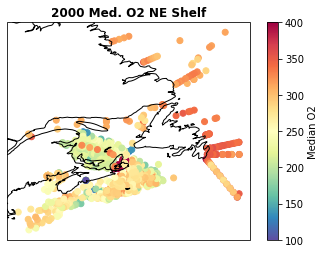

In [350]:
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

kw_ox = {
    'vmin': 100,
    'vmax': 400,
    'cmap':'Spectral_r'
}


plt.scatter(ctd_2000.lon, ctd_2000.lat, c=ctd_2000.med_o2, **kw_ox)
#ax.stock_img()
plt.colorbar(label='Median O2')
plt.title('2000 Med. O2 NE Shelf', weight='heavy')

Text(0.5, 1.0, '2001 Med. O2 NE Shelf')

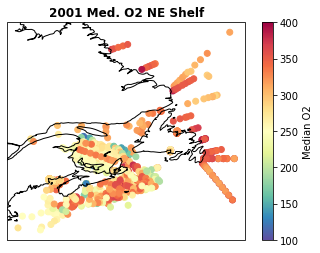

In [351]:
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

kw_ox = {
    'vmin': 100,
    'vmax': 400,
    'cmap':'Spectral_r'
}


plt.scatter(ctd_2001.lon, ctd_2001.lat, c=ctd_2001.med_o2, **kw_ox)
#ax.stock_img()
plt.colorbar(label='Median O2')
plt.title('2001 Med. O2 NE Shelf', weight='heavy')

Text(0.5, 1.0, '2002 Med. O2 NE Shelf')

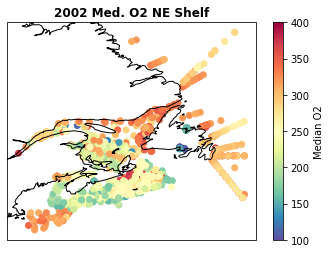

In [352]:
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

kw_ox = {
    'vmin': 100,
    'vmax': 400,
    'cmap':'Spectral_r'
}


plt.scatter(ctd_2002.lon, ctd_2002.lat, c=ctd_2002.med_o2, **kw_ox)
#ax.stock_img()
plt.colorbar(label='Median O2')
plt.title('2002 Med. O2 NE Shelf', weight='heavy')

### try to get a time averaged thing

In [353]:
#Code modified from: https://stackoverflow.com/questions/53189427/how-to-open-multiple-csv-files-from-a-folder-in-python
# the path to your csv file directory
mycsvdir = '/shared/marn5895/data/HungJosiahProject/'

# get all the csv files in that directory (assuming they have the extension .csv)
csvfiles = glob.glob(os.path.join(mycsvdir, '*.csv'))

# loop through the files and read them in with pandas
dataframes = []  # a list to hold all the individual pandas DataFrames
for csvfile in csvfiles:
    df = pd.read_csv(csvfile)
    dataframes.append(df)

In [354]:
# concatenate them all together
df = pd.concat(dataframes, ignore_index=True)

In [355]:
df = pd.concat(dataframes, ignore_index=True)
new_df = process_df(df, inspect=False)

String transfer:  Temperature
String transfer:  Salinity
String transfer:  z
String transfer:  Oxygen
String transfer:  Chlorophyll
Removing Ellipsis in:  Temperature
Removing Ellipsis in:  Salinity
Removing Ellipsis in:  z
Removing Ellipsis in:  Oxygen
Removing Ellipsis in:  Chlorophyll


In [356]:
#new_df

In [357]:
def find_med_o2(df):
    ox_ser = df['Oxygen']
    o2_med_values = []
    for index, value in ox_ser.items():
        o2_med_values.append(np.median(value))
        
    
    df['med_o2'] = o2_med_values

In [358]:
find_med_o2(new_df)

In [359]:
new_df

,lat,lon,time,Temperature,Salinity,z,Oxygen,Chlorophyll,Unnamed: 0,med_o2
0,32.1833,-78.6000,1969-01-07 21:00:00,"[19.444, 16.667, 16.111, 13.444, 11.944, 10.0,...","[36.679, nan, 36.679, nan, nan, nan, nan, nan,...","[0.0, 48.8, 61.0, 79.2, 91.4, 109.7, 121.9, 14...",[nan],[nan],NaN,NaN
1,30.4500,-71.3333,1969-01-15 01:00:00,"[22.222, 21.111, 20.111, 19.889, 19.444, 19.22...","[34.9, 32.4, 31.5, nan, nan, nan, nan, nan, na...","[0.0, 121.9, 137.2, 152.4, 167.6, 198.1, 213.4...",[nan],[nan],NaN,NaN
2,30.1000,-74.3833,1969-01-17 06:59:59,"[20.389, 20.389, 20.111, 20.111, 20.556, 20.72...",[nan],"[0.0, 6.1, 15.2, 137.2, 143.3, 149.4, 228.6, 2...",[nan],[nan],NaN,NaN
3,30.7333,-71.1667,1969-01-20 08:00:00,"[20.444, 20.444, 19.389, 18.889, 18.556, 18.33...","[36.369, nan, nan, nan, nan, nan, nan, nan, na...","[0.0, 121.9, 152.4, 182.9, 213.4, 243.8, 274.3...",[nan],[nan],NaN,NaN
4,33.3667,-73.7833,1969-01-31 01:00:00,"[19.722, 19.722, 19.722, 19.722, 19.444, 18.83...","[36.5, nan, nan, nan, nan, nan, nan, nan, nan,...","[0.0, 30.5, 61.0, 121.9, 137.2, 182.9, 213.4, ...",[nan],[nan],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
246397,47.0000,-50.6667,1984-12-15 11:19:59,"[2.238, 2.236, 2.231, 2.069, 1.816, 1.723, 1.6...","[32.141, 32.144, 32.148, 32.208, 32.267, 32.28...","[14.874955, 24.79099, 29.748827, 34.706543, 39...",[nan],[nan],NaN,NaN
246398,47.0167,-50.0433,1984-12-15 14:09:00,"[2.365, 2.37, 2.369, 2.369, 2.368, 1.92, 0.989...","[32.177, 32.176, 32.175, 32.176, 32.176, 32.32...","[4.958431, 9.916741, 19.833002, 29.748781, 34....",[nan],[nan],NaN,NaN
246399,30.9667,-74.6000,1984-12-16 13:59:59,"[21.389, 21.389, 21.111, 20.0, 19.389, 18.611,...",[nan],"[0.0, 67.1, 78.9, 110.0, 121.9, 152.1, 182.9, ...",[nan],[nan],NaN,NaN
246400,31.0833,-74.2167,1984-12-21 08:00:00,"[22.778, 22.778, 22.222, 21.889, 21.722, 21.11...",[nan],"[0.0, 36.9, 49.1, 54.9, 61.0, 78.9, 91.1, 116....",[nan],[nan],NaN,NaN


In [360]:
avg_med_o2 = new_df.loc[[x.year>1900 for x in new_df.time],:].set_index(['time'])['med_o2'].resample('1Y').mean()

In [361]:
avg_med_o2

time
1961-12-31           NaN
1962-12-31           NaN
1963-12-31           NaN
1964-12-31           NaN
1965-12-31           NaN
                 ...    
2017-12-31    264.456162
2018-12-31    247.440483
2019-12-31    242.772527
2020-12-31    284.288760
2021-12-31    274.231962
Freq: A-DEC, Name: med_o2, Length: 61, dtype: float64

Text(0, 0.5, 'Avg Med. Dissolved O2 (ppm)')

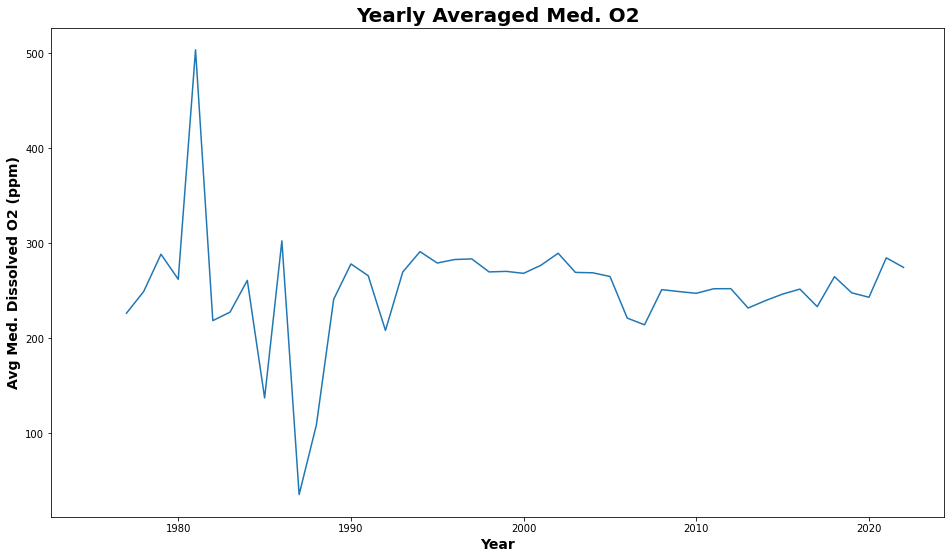

In [362]:
plt.figure(figsize=(16,9))
plt.plot(avg_med_o2)
plt.title('Yearly Averaged Med. O2', weight='heavy', fontsize=20)
plt.xlabel('Year', weight='heavy', fontsize=14)
plt.ylabel('Avg Med. Dissolved O2 (ppm)', weight='heavy', fontsize=14)

### Code that i couldn't figure out how to use but i didn't want to get rid of

#### Basically want to do the following:
#### - Be able to loop through each CSV file, and get the med o2 for each index (lat,lon)
#### - Use that new med o2 for each index to create a fig for each year
#### - Create an animation that loops through the figs from each year to show how med o2 has changed

In [43]:
# made a depth profile from the CTD values! (at a single index)

# plt.plot(ox_3,z_3)
# plt.title('2000 CTD [3]', weight='heavy')
# #plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()

#plt.set_xlabel('X LABEL')    
#plt.xaxis.set_label_position('top') 

In [175]:
# import os
# import glob

# # for filename in os.listdir('path/to/dir'):
# #     if filename.endswith('.log'):
# #         with open(os.path.join('path/to/dir', filename)) as f:
# #             content = f.read()

# for filename in os.listdir('/shared/marn5895/data/HungJosiahProject/'):
#     if '_ctd' in filename:
#         print(filename)
    

# #Code modified from: https://stackoverflow.com/questions/53189427/how-to-open-multiple-csv-files-from-a-folder-in-python
# # the path to your csv file directory
# # mycsvdir = '/shared/marn5895/data/HungJosiahProject/'

# # # get all the csv files in that directory (assuming they have the extension .csv)
# # csvfiles = glob.glob(os.path.join(mycsvdir, '*.csv'))

# # # loop through the files and read them in with pandas
# # dataframes = []  # a list to hold all the individual pandas DataFrames
# for csvfile in csvfiles:
#     df = pd.read_csv(csvfile)
#     dataframes.append(df)
    
# df = pd.concat(dataframes, ignore_index=True)
# new_df = process_df(df, inspect=False)

# path = 'C:\\Users\\Me\\Desktop\\Names'
# names = ['Mark','Frank','Peter']

# csvs = [
#     pd.read_csv(f'{path}{name}.csv')
#     for name in names
# ]

In [ ]:
## trying to figure out a way to get an additional column with a oxygen median value at each lon,lat

#df['Storm Surge (ft)'] = df['Verified (ft)']-df['Predicted (ft)']

# Here's a sequence of steps I used to find an average value for one of the salinity arrays

#test_salinity = df2000_ctd['Salinity'] - put salinty column into its own series
#t_5017 = test_salinity[5017] - selected a point in the series via the index value, in this case that was 5017
#t_5017 = np.delete(t_5017,-1) - had a -9999 in it for some reason, so removed that value using np.delete
#t_5017 - made sure the -9999 was gone
#avg_5017 = t_5017.mean() - found the average of the new numpy.array and assigned it to a variable
#avg_5017 - printed that variable, it worked! we found the average salinity at that indexed point